# Escalamiento de datos que ya están escalados

Este dataset ya se nos suministra escalado, si lo volvemos a escalar los histogramas son igaules aunque los valores numéricos no.

In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector
from sklearn import datasets



In [2]:
#Carga del dataset de diabetes
# Titulo: Dabetes dataset
# Url: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

X, y= datasets.load_diabetes(return_X_y=True)

df_diabetes = datasets.load_diabetes(as_frame=True)
# Selecciona la segunda columna: bmi body mass index
raw = X[:, None,2]

Data_bmi = pd.DataFrame(raw, columns=['bmi_body_mass_index'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data_bmi.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_bmi_prep_SS = preprocessor_SS.fit_transform(Data_bmi)
Data_bmi_prep_RR = preprocessor_RR.fit_transform(Data_bmi)

# Ponermos en un dataframe las tres columnas para ver las diferencias entre valores no escalados y escalados:
# los valores inciciales, y los valores escalados con los dos métodos.
data_bmi_compared_scaled_array=np.column_stack((raw, Data_bmi_prep_SS, Data_bmi_prep_RR))
data_bmi_compared_scaled_df = pd.DataFrame(data_bmi_compared_scaled_array, columns=['bmi_original', 'bmi_SS', 'bmi_RR'])

data_bmi_compared_scaled_df

,bmi_original,bmi_SS,bmi_RR
0,0.061696,1.297088,0.582645
1,-0.051474,-1.082180,0.148760
2,0.044451,0.934533,0.516529
3,-0.011595,-0.243771,0.301653
4,-0.036385,-0.764944,0.206612
...,...,...,...
437,0.019662,0.413360,0.421488
438,-0.015906,-0.334410,0.285124
439,-0.015906,-0.334410,0.285124
440,0.039062,0.821235,0.495868


In [ ]:
#df_diabetes

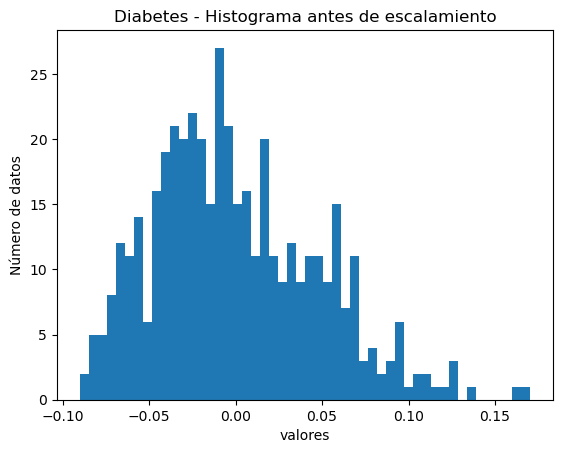

In [3]:
# Tarda unos dos minutos en ejecutarse
plt.hist(raw, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Diabetes - Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


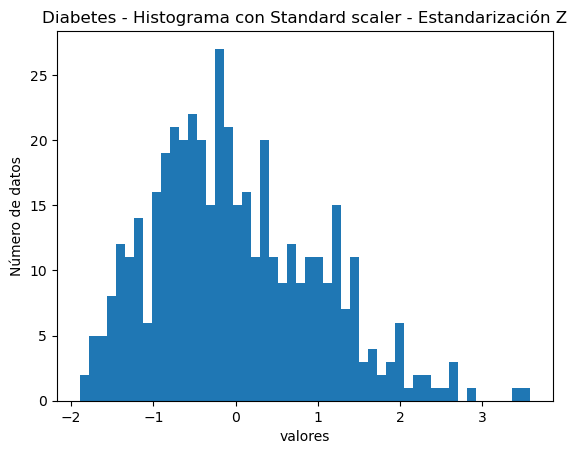

In [4]:
plt.hist(Data_bmi_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Diabetes - Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [5]:
Data_bmi_prep_SS.std()


1.0

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



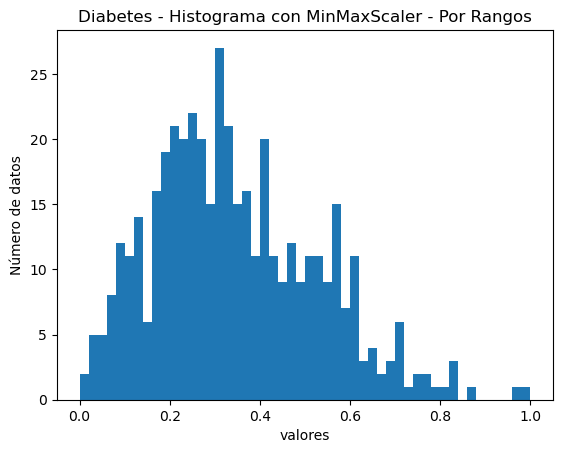

In [6]:
plt.hist(Data_bmi_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Diabetes - Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [7]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_bmi_prep_RR[:,0])-np.min(Data_bmi_prep_RR[:,0])

1.0

In [8]:
# No tengo claro cómo interpreatra el siguiente cálculo del rango
#Rango
#Data_prep_SS[:,1]
np.max(Data_bmi_prep_SS[:,0])-np.min(Data_bmi_prep_SS[:,0])

5.483647693418881